# Variable transformers : LogTransformer

The LogTransformer() applies the natural logarithm or the base 10 logarithm to
numerical variables. The natural logarithm is logarithm in base e.

The LogTransformer() only works with numerical non-negative values. If the variable
contains a zero or a negative value the transformer will return an error.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.transformation import LogTransformer

In [2]:
# # load data

# data = pd.read_csv('houseprice.csv')
# data.head()

# # let's separate into training and testing set

# X_train, X_test, y_train, y_test = train_test_split(
#     data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

# X_train.shape, X_test.shape

In [3]:
# Read the separate files
train_df = pd.read_csv('../data/house-prices/train.csv')
test_df = pd.read_csv('../data/house-prices/test.csv')

# Separate features and target in training data
X_train = train_df.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df['SalePrice']

# For test data, you might not have the target variable
X_test = test_df.drop(['Id'], axis=1)  # Note: test data might not have SalePrice column

print("X_train :", X_train.shape)
print("X_test :", X_test.shape)

X_train : (1460, 79)
X_test : (1459, 79)


<Axes: >

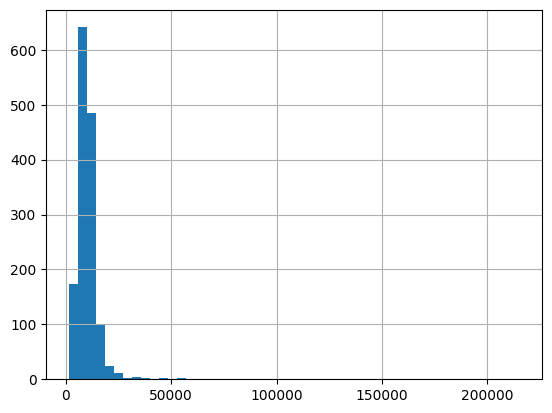

In [4]:
# plot distributions before transformation

X_train['LotArea'].hist(bins=50)

<Axes: >

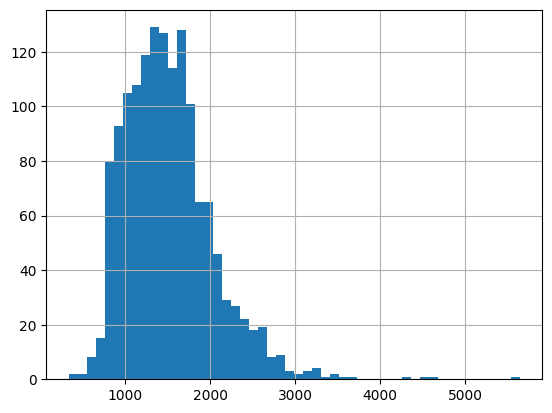

In [5]:
# plot distributions before transformation

X_train['GrLivArea'].hist(bins=50)

## Log base e

In [6]:
# Initialzing the tansformer with log base e

lt = LogTransformer(variables=['LotArea', 'GrLivArea'], base='e')

lt.fit(X_train)

LogTransformer(variables=['LotArea', 'GrLivArea'])

In [7]:
# variables that will be transformed

lt.variables_

['LotArea', 'GrLivArea']

In [8]:
# apply the log transform

train_t = lt.transform(X_train)
test_t = lt.transform(X_test)

<Axes: >

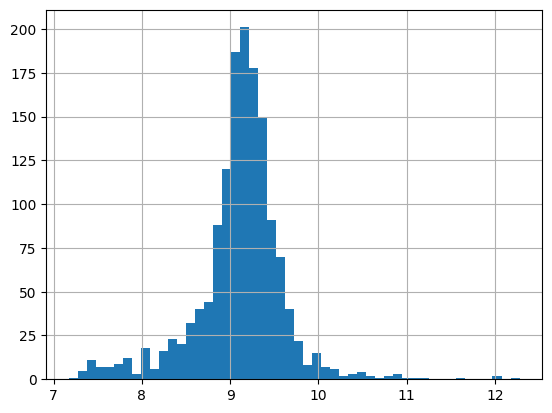

In [9]:
# transformed variable distribution

train_t['LotArea'].hist(bins=50)

<Axes: >

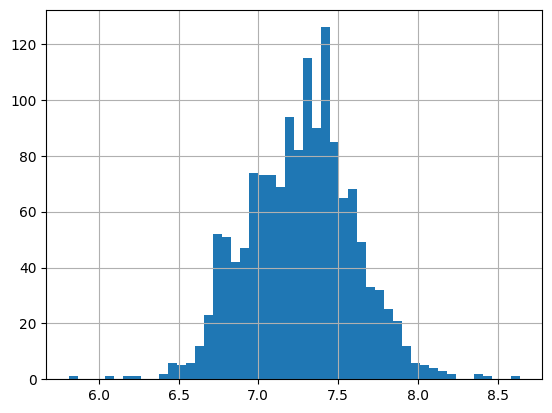

In [10]:
# transformed variable distribution

train_t['GrLivArea'].hist(bins=50)

In [11]:
# return variables to original representation

train_orig = lt.inverse_transform(train_t)
test_orig = lt.inverse_transform(test_t)

<Axes: >

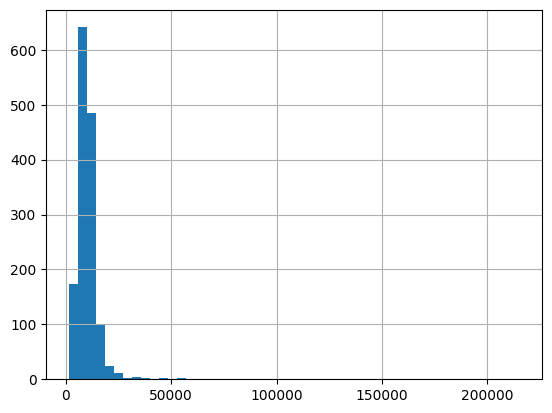

In [12]:
# inverse transformed variable distribution

train_orig['LotArea'].hist(bins=50)

<Axes: >

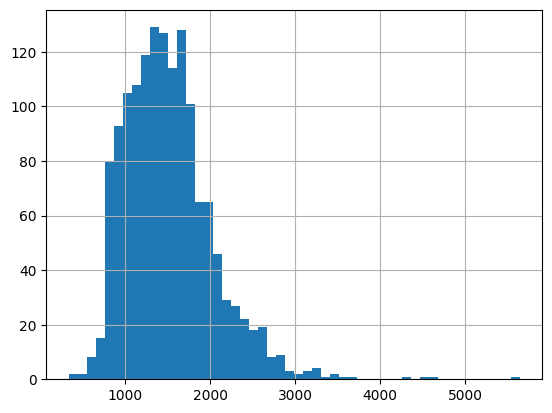

In [13]:
# inverse transformed variable distribution

train_orig['GrLivArea'].hist(bins=50)

## Automatically select numerical variables

The transformer will transform all numerical variables if no variables are specified.

In [14]:
# load numerical variables only

variables = ['LotFrontage', 'LotArea',
             '1stFlrSF', 'GrLivArea',
             'TotRmsAbvGrd', 'SalePrice']


In [15]:
# data = pd.read_csv('houseprice.csv', usecols=variables)

# # let's separate into training and testing set

# X_train, X_test, y_train, y_test = train_test_split(
#     data.drop(['SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

# X_train.shape, X_test.shape

In [16]:

# # Read the separate files - only reading the columns we need
# train_df = pd.read_csv('../data/house-prices/train.csv', usecols=['Id'] + variables)
# test_df = pd.read_csv('../data/house-prices/test.csv', usecols=['Id'] + variables[:-1])  # excluding SalePrice for test

# # Separate features and target in training data
# X_train = train_df.drop(['Id', 'SalePrice'], axis=1)
# y_train = train_df['SalePrice']

# # For test data, you might not have the target variable
# X_test = test_df.drop(['Id'], axis=1)

# print("X_train :", X_train.shape)
# print("X_test :", X_test.shape)

# ----------------------------------------------------------------------------------

# Read the separate files
train_df = pd.read_csv('../data/house-prices/train.csv')
test_df = pd.read_csv('../data/house-prices/test.csv')

# Separate features and target in training data
X_train = train_df.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df['SalePrice']

# For test data, you might not have the target variable
X_test = test_df.drop(['Id'], axis=1)  # Note: test data might not have SalePrice column

print("X_train :", X_train.shape)
print("X_test :", X_test.shape)

X_train : (1460, 79)
X_test : (1459, 79)


In [17]:
# Impute missing values

arbitrary_imputer = ArbitraryNumberImputer(arbitrary_number=2)

arbitrary_imputer.fit(X_train)

# impute variables
train_t = arbitrary_imputer.transform(X_train)
test_t = arbitrary_imputer.transform(X_test)

In [18]:
numeric_columns = train_t.select_dtypes(include=['int64', 'float64']).columns
# numeric_columns_t = test_t.select_dtypes(include=['int64', 'float64']).columns

In [19]:
train_numeric = train_t[numeric_columns].copy()
# test_numeric = test_t[numeric_columns_t].copy()

In [20]:
train_numeric

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [21]:
# Define columns where zero is meaningful (count-based features)
meaningful_zeros = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                   'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
                   'PoolArea']

# Define area-based columns that need shifting
area_columns = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea',
                'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                'ScreenPorch', 'MiscVal']

# Create a copy of the training data
train_shifted = train_numeric.copy()

# Add small constant (1) only to area-based columns
for col in area_columns:
    train_shifted[col] = train_numeric[col] + 1

# Exclude meaningful zeros from log transformation
variables_to_transform = [col for col in train_numeric.columns if col not in meaningful_zeros]


In [22]:
# # Check which columns have zeros or negative values
# problematic_cols = []
# for col in train_numeric.columns:
#     if (train_numeric[col] <= 0).any():
#         problematic_cols.append(col)
#         print(f"{col}: Min value = {train_numeric[col].min()}")

# print("\nTotal problematic columns:", len(problematic_cols))

In [23]:

# Now apply log transformation only to specified variables
lt = LogTransformer(base='10', variables=variables_to_transform)
lt.fit(train_shifted)

LogTransformer(base='10',
               variables=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
                          'OverallCond', 'YearBuilt', 'YearRemodAdd',
                          'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                          'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                          'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt',
                          'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                          'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                          'MiscVal', 'MoSold', 'YrSold'])

In [24]:
# variables that will be transformed

lt.variables_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'YrSold']

Text(0.5, 1.0, 'GrLivArea')

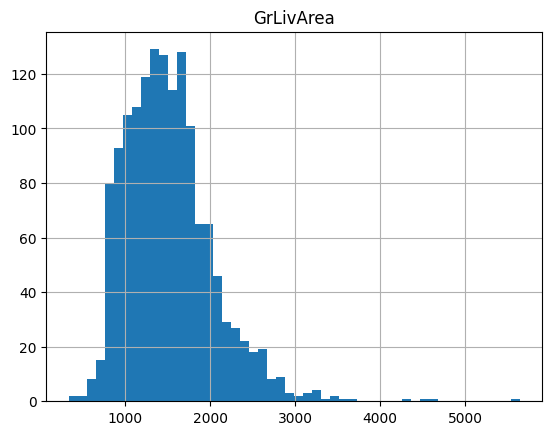

In [25]:
# before transformation
train_t['GrLivArea'].hist(bins=50)
plt.title('GrLivArea')

Text(0.5, 1.0, 'LotArea')

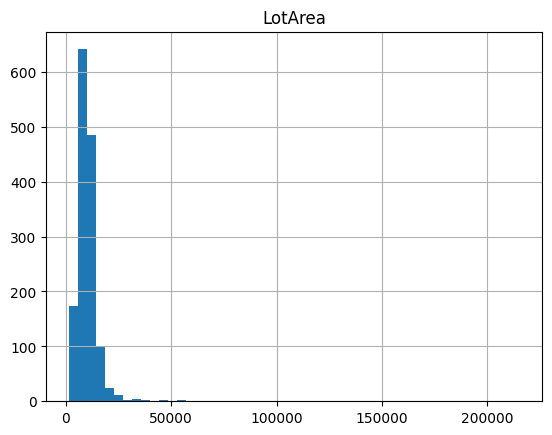

In [26]:
# Before transformation
train_t['LotArea'].hist(bins=50)
plt.title('LotArea')

In [28]:
train_t.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [27]:
# transform the data

train_t = lt.transform(train_t)
test_t = lt.transform(test_t)

ValueError: The number of columns in this dataset is different from the one used to fit this transformer (when using the fit() method).

Text(0.5, 1.0, 'GrLivArea')

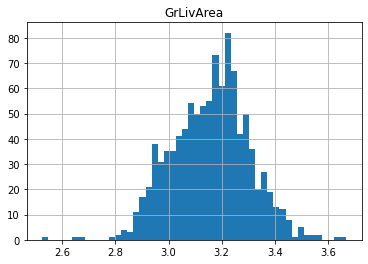

In [22]:
# transformed variable

train_t['GrLivArea'].hist(bins=50)
plt.title('GrLivArea')

Text(0.5, 1.0, 'LotArea')

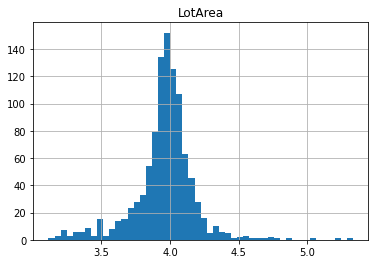

In [23]:
# transformed variable
train_t['LotArea'].hist(bins=50)
plt.title('LotArea')

In [24]:
# return variables to original representation

train_orig = lt.inverse_transform(train_t)
test_orig = lt.inverse_transform(test_t)

<AxesSubplot:>

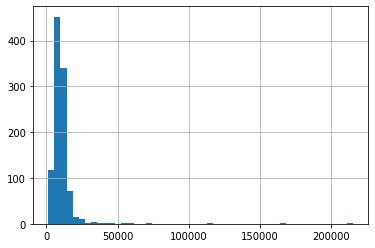

In [25]:
# inverse transformed variable distribution

train_orig['LotArea'].hist(bins=50)

<AxesSubplot:>

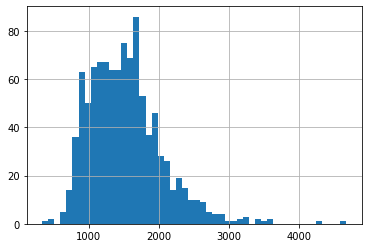

In [26]:
# inverse transformed variable distribution

train_orig['GrLivArea'].hist(bins=50)